# <center>Droplet Breakup in Subsea Oil Releases</center>

## <center>Part 2:<br/>Predictions of droplet size distributions with and without indection of chemical dispersants.</center>

### <center>Original Paper By: &Oslash;istein Johansen, Per Johan Brandvik, Umer Farooq</center> 

## 1. Introduction

The size distribution of oil droplets formed in deep water oil and gas blowouts is known to have strong impact on the subsequent fate of the oil in the environment (<b>Johansen, 2003</b>).  Deep water blowouts are more sensitive to crossflow and ambient density stratifications than blowouts in moderate to shallow water.  This is due to reduced buoyancy caused by the strong compression of the gas in deep water, together with other factors such as non-ideal gas behavior and the potential for a substantial fraction of gas dissolved in the oil phase.<br/>
In blowouts from moderate to shallow depths, the large buoyancy generated by the expanding gas will in general bring the plume of entrained water to the sea surface together with dispersed oil droplets and gas bubbles.  A relatively homogeneous thin surface oil slick will then form as the dispersed oil droplets settles out of the outward flow of the surfacing entrained water.  A deep water plume (with small buoyancy) is more likely to be trapped by the ambient density stratification or bent over by crossflow.<br/>
In both cases, gas bubbles and oil droplets will separate from the plume and rise to the surface with their own terminal velocities.  Large droplets will rise relatively rapidly and come to the surface relatively close to the discharge location, while small droplets will rise more slowly and can be transported long distances from the discharge location with ambient currents before reaching the sea surface.  The smallest droplets may even be kept suspended in the water masses for prolonged time periods by vertical oceanic turbulent mixing, subject to enhanced dissolution and natural biodegradation.<br/>
Releases which are predominantly producing large oil droplets (in the millimeter size range) may thus result in relatively thick surface oil slicks, while thin surface films may be expected from releases producing small droplets (micrometer range).  Thin oil films may not form water-in-oil emulsions and will thus be more susceptible to natural dispersion.  This implies that films will have distinctly shorter persistence on the sea surface than thicker oil slicks, and the possibility of oiling of adjacent shorelines may thus be strongly reduced.

Reliable predictions of the droplet size distribution in deep water blowouts will thus improve our ability to forecast the fate of oil in the environment, provide guidance for oil spill response operations and relevent information to the public.  Presently, the only available experimental droplet size data at near full scale was obtained in the DeepSpill experiment conducted at 844M in the Norwegian Sea (<b>Johansen et al., 2003</b>).  These limited observations have formed the basis for a Weber number scaling based prediction method for droplet size that are used in many deep water blowout models today (<b>Chen and Yapa, 2007</b>).  Other studies of oil droplet breakup have been conducted at a much smaller scale (<b>Masutani and Adams, 2000; Tang and Masutani, 2003</b>), but extrapolation of such small scale results to larger scales are doubtful.<br/>
However, more recently, SINTEF has initiated laboratory studies of oil droplet breakup in a meso-scale test facility, comprising a cylindrical tank with a height of 6m and a diameter of 3m.  This test facility is presented in a companion paper, with a description of the experimental setup and examples of findings from oil only experiments and experiments with injection of chemical dispersants (<b>Brandvik et al., in press</b>).  In this paper, we present a new model for prediction of initial droplet size distributions in subsea oil and gas releases that has been derived from the experimental data presented in the companion paper, supported by findings from a review of theoretical aspects of droplet breakup.

## 2. Theory

### 2.1. Droplet Breakup Regimes

In [1]:
import numpy as np

Droplet breakup may be caused by different mechanisms depending on the properties of the fluid and the outlet conditions, ranging from pendant droplets that separate from the nozzle when the buoyant forces outrange the interfacial tension forces, through various axial or transverse instabilities of the jet, to full atomization where droplets of a wide size range are generated almost instantaniously at the jet exit.

The full range of breakup regimes of oil jets in water were investigated in laboratory experiments reported by <b>Masutani and Adams (2000)</b> and <b>Tang and Masutani (2003)</b>.  As previously observed from breakup experiments with liquid jets in air, Masutani et al. found that the breakup regimes of oil jets in water could be delimited in a Reynolds number (Re) vs. Ohnesorge number (Oh) diagram.  The two non-dimensional numbers are defined as:

$$
\begin{align}
U &= \text{the exit velocity} \cr
D &= \text{the orifice diameter} \cr
\sigma &= \text{the oil-water interfacial tension} \cr
\rho &= \text{density of the jet fluid} \cr
\mu &= \text{dynamic viscosity of the jet fluid} \cr
\cr
Re &= { -\rho U D \over \mu } \cr
Oh &= { \mu \over (\rho \sigma D)^{1/2} } \cr
\end{align}
$$

In [83]:
def m_3_s_to_pipe_velocity(m_3_s, diameter):
    return m_3_s * 4 / (np.pi * diameter ** 2.0)

def reynolds_number(fluid_density, fluid_viscosity,
                    exit_velocity, orifice_diameter):
    return fluid_density * exit_velocity * orifice_diameter / fluid_viscosity

def ohnesorge_number(fluid_density, fluid_viscosity,
                     ow_interfacial_tension, orifice_diameter):
    return fluid_viscosity / (fluid_density * ow_interfacial_tension * orifice_diameter) ** (1.0 / 2.0)

# using BAHIA as an example
# - density = 848.8 kg/m^3
# - kvis = 1.7e-5 m^2/s  (note: need kinematic to dynamic conversion dvis = kvis * density)
# - oil-water IFT is 0.02995008 N/m
# - 20 L/min = 0.000333333 m^3/s
# - 20 mm = 0.02 m

# do these numbers seem reasonable???
print 'Re = ', reynolds_number(848.8,
                               1.7e-5 * 848.8,
                               m_3_s_to_pipe_velocity(0.000333333, 0.02),
                               0.02)

print 'Oh = ', ohnesorge_number(848.8,
                                1.7e-5 * 848.8,
                                0.02995008, 0.02)

Re =  1248.27281519
Oh =  0.0202366031766


The Ohnesorge number is a combination of the Reynolds number and the Weber number, i.e.

$$
\begin{align}
We &= \rho U^2 D / \sigma \cr
Oh &= We^{1/2}/Re \cr
\end{align}
$$

In [43]:
def weber_number(fluid_density,
                 ow_interfacial_tension,
                 exit_velocity, orifice_diameter):
    return fluid_density * exit_velocity ** 2 * orifice_diameter / ow_interfacial_tension

rey_num = reynolds_number(848.8,
                          1.7e-5 * 848.8,
                          0.000333333, 0.02)

oh_num = ohnesorge_number(848.8,
                          1.7e-5 * 848.8,
                          0.02995008, 0.02)

we_num = weber_number(848.8, 0.02995008, 0.000333333, 0.02)

# we seem to have an unwanted negative here.  Perhaps the Re formula is off?
print 'Oh ?= (We^{1/2} / Re) :', oh_num, (we_num ** (1.0/2.0) / rey_num)

Oh ?= (We^{1/2} / Re) : 0.0202366031766 0.0202366031766


The boundaries between laminar and transitional breakup and the boundary between the transitional and turbulent (atomization) breakup regimes were found to represent linear relationships of the form:

$$
\begin{align}
c &= \text{a constant of proportionality} \cr
Oh &= cRe^{-1} = { c \over Re }\cr
\end{align}
$$

From the definition of Ohnesorge number mentioned above, this relationship implies that both boundaries are lines for constant Weber number, with:

$$
\begin{align}
We &= c^2
\end{align}
$$

For the boundary between the transitional and turbulent breakup regime, the constant was found to be 18, implying that:

$$
\begin{align}
We &= 18^2 = 324 \cr
\end{align}
$$

Using the transitional and turbulent boundary constant, and solving for exit velocity, we get:

$$
\begin{align}
18^2 &= \rho U^2 D / \sigma \cr
{ 18^2 \sigma \over \rho D} &= U^2 \cr
18 \left({ \sigma \over \rho D} \right)^{1/2} &= U \cr
\end{align}
$$

In [25]:
def transitional_turbulent_boundary(fluid_density,
                                    ow_interfacial_tension,
                                    orifice_diameter):
    '''
        Ok, here is an example of how we could maybe use the the proportionality constant c.
        c is 18, and c = We^{1/2}
        So maybe we would like to know what exit velocity exists at the
        transitional and turbulent boundaries for a given oil.
        U = 18 * (\sigma / (\rho * D)) ** (1.0 / 2.0)
    '''
    return 18 * (ow_interfacial_tension / (fluid_density * orifice_diameter)) ** (1.0 / 2.0)

trans_boundary = transitional_turbulent_boundary(848.8, 0.02995008, 0.02)
print trans_boundary

we_num = weber_number(848.8, 0.02995008, trans_boundary, 0.02)
print we_num, we_num == 324.0

0.756055740506
324.0 True


In the present study, where the main focus is on turbulent breakup, these findings were useful as a basis for limiting the experimental conditions for the breakup experiments.

<b>Fig. 1</b> shows how the Ohnesorge vs. Reynolds number diagram can be used to delimit the range of discharge conditions.  The parallelogram formed grid in the diagram depicts a range of possible orifice diameters and oil flow rates that might be used in the tower tank experiments.  The orifice diameters are here limited to the range from 0.5 to 20 mm, with oil flow rates in the range from 0.1 to 20 L/min.  

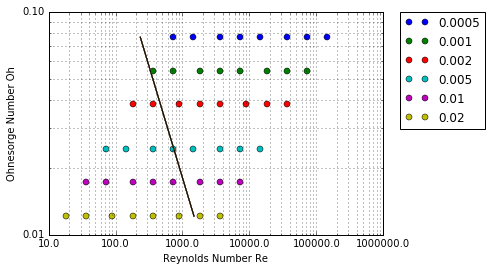

In [104]:
from pylab import *
%matplotlib inline
matplotlib.pyplot.grid(True, which="both")
from matplotlib.ticker import FormatStrFormatter

ax = subplot(111)
plt.xscale('log')
plt.yscale('log')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# - 1 L/min = 1.6667e-5 m^3/s
exit_volume = np.array((0.1,
                        0.2,
                        0.5,
                        1.0,
                        2.0,
                        5.0,
                        10.0,
                        20.0)) * 1.6667e-5

# interfacial tension is unknown here and could skew the Ohnesorge numbers
ift = np.linspace(0.01, 0.01, 8)

nozzle_size = np.array((0.0005,
                        0.001,
                        0.002,
                        0.005,
                        0.01,
                        0.02))

# x axis is the Reynolds number
for d in nozzle_size:
    # density = ??? (for now we use the BAHIA density)
    # viscosity = 5 cP = 0.005 kg/(m s)
    x = reynolds_number(848.8,
                        0.005,
                        m_3_s_to_pipe_velocity(exit_volume, d),
                        d)

    y = ohnesorge_number(848.8,
                         0.005,
                         ift, d)

    plt.plot(x, y, 'o', label='{}'.format(d), linewidth=1)

x_b = []
y_b = []
for d in nozzle_size:
    # density = ???
    # viscosity = 5 cP = 0.005 kg/(m s)
    boundary_velocity = transitional_turbulent_boundary(848.8, ift, d)

    x_b.append(reynolds_number(848.8,
                               0.005,
                               boundary_velocity, d))

    y_b.append(ohnesorge_number(848.8,
                                0.005,
                                ift, d))

plt.plot(x_b, y_b)



plt.xlabel('Reynolds Number Re')
plt.ylabel('Ohnesorge Number Oh')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The thick solid line drawn in the diagram shows the boundary between the transition regime and the turbulent breakup (or atomization) regime.  The preferred range of experimental conditions is shown with crossed markers.  Some of the cases in the turbulent breakup regime that will produce high outlet velocities (>40 m/s) are also left out.  These cases could be difficult to realize due to high pressure loss in the oil supply line.

### 2.2. Weber Number Scaling

The classical theory of droplet splitting in stationary turbulence predicts a maximum stable droplet size $d_{max}$ given by the equation:

$$
\begin{align}
a &= \text{a constant of proportionality} \cr
\rho &= \text{density of the continuous phase (water)} \cr
\varepsilon &= \text{the turbulent dissipation rate (Hinze, 1955)} \cr
\cr
d_{max} &= a(\sigma / \rho)^{3/5} \varepsilon^{-2/5} \quad \quad \quad (Eq. 1)\cr
\end{align}
$$

However, in a turbulent round jet, the turbulent dissipation rate $\varepsilon$ decreases with the distance from the nozzle exit.  Thus, during the time needed for the droplets to finish its bereakup process, they will be transported to regions with decreasing values of $\varepsilon$.  Still, Hinze's model may serve as a starting point for experimental design and development of more practical empirical equations.<br/>
According to <b>Martines-Baz&aacute;n et al. (2002)</b>, Eq. 1 can be used to define a critical droplet size based on the local (downstream) value of $\varepsilon$ in the turbulent jet.  They argue that the breakup process will be completed at the downstream distance $X'$, where the breakup has reduced the local maximum droplet size to this value.  By taking into account that the dissipation rate in a turbulent round jet scales with the relative downstream distance $X/D$ and the exit dissipation rate $\varepsilon_0$, the corresponding equation for $d_{max}$ can be expressed as:

$$
\begin{align}
\varepsilon_0 &\sim U^3/D \cr
A &= \text{an empirical factor depending on the relative breakup length } X'/D \cr
\cr
We &= \text{the exit Weber number} \cr
&= \rho U^2 D / \sigma \cr
\cr
d_{max}/D &= A We^{-3/5} \cr
d_{max} &= A D (We)^{-3/5} \cr
\end{align}
$$

It should be noted that a Weber number scaling is also predicted by simple dimensional ananlysis based on the governing variables $U$, $D$, $\rho$, and $\sigma$, but this will leave the ecponent in the power law unknown (to be determined experimentally).  It should also be noted that the maximum diameter can be substituted by any chosen characteristic diameter (e.g. the volume median diameter $d_{50}$) by an appropriate choice of the empirical factor $A$.  So far, we have no guarantee that this facotr is a constant, but empirical data will show if this is a reasonable assumption.

This scaling law is supposed to be valid when the breakup is limited by the interfacial tension of the jet liquid.  However, as <b>Hinze (1955)</b> also pointed out, internal viscous stresses in the fluid droplets may also influence the breakup.  Hinze introduced a dimensionless viscosity group $N_{vi}$ to account for this effect.  Hinze's viscosity group is actually identical tothe Ohnesorge number defined above.<br/>
More recently, <b>Wang and Calabrese (1986)</b> proposed to replace Hinze'a viscosity group by the viscosity number:

$$
\begin{align}
Vi = \mu U / \sigma
\end{align}
$$

to account for the effect of viscous stresses.  This dimensionless number is also defined in terms of the Weber number and the Reynolds number i.e.:

$$
\begin{align}
Vi = We/Re
\end{align}
$$

The same authers found that droplet breakup was governed by the Weber number scaling for small viscosity numbers $(Vi \to 0)$, but that a Reynolds number scaling would apply for large viscosity number $(Vi \gg 1)$:

$$
\begin{align}
C &= \text{an empirical factor maybe???} \cr
\cr
d_{max} / D &= C Re^{-3/4} \quad \quad \quad (Eq. 2)\cr
\end{align}
$$

They derived a semi-empirical equation for the intermediate case, where both interfacial tension and viscous forces are influencing droplet breakup:

$$
\begin{align}
B &= \text{an empirical coefficient} \cr
\cr
{d_{50} \over D} &= A We^{-3/5} \left[ 1 + B Vi \left( {d_{50} \over D} \right)^{1/3} \right]^{3/5} \quad \quad \quad (Eq. 3)\cr
\end{align}
$$

For large values of the viscosity number, $Vi \gg 1$, Eq. 3 can be approximated by the equation:

$$
\begin{align}
\left({d_{50} \over D} \right)^{4/5} &= A We^{-3/5} \left( B Vi \right)^{3/5} \cr
\end{align}
$$

By taking into account that the viscosity number is the ratio between the Weber number and the Reynolds number, this equation can be expressed in terms of the Reynolds number:

$$
\begin{align}
\left({d_{50} \over D} \right) &= A^{5/4} B^{3/4} Re^{-3/4} \quad \quad \quad (Eq. 4) \cr
\end{align}
$$

This implies that the coefficient $C$ in Eq. 2 is:

$$
\begin{align}
C &= A^{5/4} B^{3/4} \cr
\end{align}
$$

Wang and Calabrese's equation (Eq. 3) thus changes from a Weber number scaling to a Reynolds number scaling when the viscosity number increases and eventually becomes very large $(Vi \gg 1)$.

We will return to this relationship in the discussion of the experimental results, but it should be pointed out here that the viscosity numbers usually will be small in conjunction with oil jet breakup, but large numbers may result in conjunction with application of chemical dispersant, since this can result in reductions in the interfacial tension by several orders of magnitude.

### 2.3. Effects of Gas Void Fraction and Buoyancy

Most oil jet breakup experiments are conducted with a single fluid into water (crude oil or silicone fluid).  In subsea blowouts, however, gas will in general be discharged together with the oil, and the oil is quite often mixed with certain amounts of formation water.  Different flow conditions can occur in such multiphase flows - from bubbly flow with oil as the continuous phase, via slug flow where oil and gas occupy sequential sections of the pipe - to mist flow where oil droplets are suspended in the gas and some oil might flow along the inner surface of the pipe (annular flow).<br/>
Bubbly flow in vertical pipes are normally associated with low to moderate gas void fractions $(0 < n < 60 \% )$, while mist flow is limited to very high void fractions $(n > 95\% )$ (<b>Gould et al., 1974</b>).  The actual flow conditions are also influenced by the velocity of the flow, often defined by the superficial velocities of the two fluids.  In the present context, we will only consider the bubbly flow condition, which is most likely in deepwater oil well blowouts.

The main issue here is how to account for the presence of gas in the normalized variables defined above (i.e. the Reynolds, Weber, and Ohnesorge numbers).  For example, <b>Neto et al. (2008)</b> defined the nozzle Reynolds number in a series of bubbly water jet experiments in terms of the superficial water velocity:

$$
\begin{align}
Q_W &= \text{the volume flow of water} \cr
A_N &= \text{the nozzle cross section} \cr
U_W &= \text{the superficial water velocity} \cr
D &= \text{the nozzle diameter} \cr
v_W &= \text{the kinematic viscosity of water} \cr
\cr
A_N &= \pi D^2/4 \cr
U_W &= Q_W/A_N \cr
Re_W &= U_W D/v_W \cr
\end{align}
$$

However, this definition does not discriminate between a pure water jet and a bubbly jet with the same water flow.  In order to account for this, the "water only" velocity may be substituted with an "effective" water velocity $U_E$ derived from the principle of conservation of momentum flux.  In the following, $M$ is the exit momentum flux of the bubbly water jet, while $M_E$ is the momentum flux of an "equivalent" single phase water jet.  The effective water velocity $U_E$ is then defined as the velocity of a single phase water jet producing the same momentum flux as the bubbly water jet:

$$
\begin{align}
M &= (\rho_W Q_W + \rho_G Q_G) U_{W + G} \quad \quad \quad (Eq. 5)\cr
Q_E &= A_N U_E \cr
M_E &= \rho_W Q_E U_E \quad \quad \quad \text{(Eq. 6) (Note: apparently, gas density is much smaller, and neglected)} \cr
\end{align}
$$

If we neglect the contribution of the gas to the momentum flux (due to the much smaller density of the gas), $M_E = M$ will imply:

$$
\begin{align}
U_E &= U_{WO} / (1 - n)^{1/2} \cr
\end{align}
$$

Since we have defined the Reynolds number in terms of the continuous phase, it is reasonable to do the same for the Weber and the Ohnesorge numbers.  We then get the following definitions of the non-dimensional variables:

$$
\begin{align}
Re &= {\rho U_E D \over \mu} \cr
We &= {\rho U_E^2 D \over \sigma} \cr
Oh &= {\mu \over (\rho \sigma D)^{1/2}} \quad \quad \quad \text{(Eqs. 7)} \cr
\end{align}
$$

When a system with oil and gas is considered (instead of water and gas), oil properties should be substituted for water properties, and for this reason, the subscripts are dropped in the density and viscosity terms (implicitly implying water or oil depending on the case).

<b>Fig. 2</b> shows a $Re$ vs. $Oh$ plot based on these definitions with results from the bubbly water jet experiments reported by <b>Neto et al. (2008)</b> covering gas volume fractions in the range from approximately 5% to 80%.

<center>Fig. 2 TBD here...</center>

Experiments where atomization was observed are represented by filled markers, while open markers represent the transition regime.  The thick line depicts the transition to full atomization based on the liquid only experiments of <b>Tang and Masutani (2003)</b>.<br/>
Fig. 3 shows a plot of the mean bubble diameter reported by Neto et al. for a set of experiments with a 6 mm nozzle.

<center>Fig. 3 TBD here...</center>

The gas volume fractions varies in a range from about 7% up to about 80%, while the water only velocities are in the range from about 0.5-3 m/s.  It is promising that the transition line derived from single liquid flows also applies to bubbly jets when we use the definitions given above of the non-dimensional numbers.  The good correlation between observed bubble diameters and the effective velocity based Weber number also indicats that the effective velocity concept is a reasonable way of accounting for the presence of gas.

This also implies that a situation with a gas volume fraction $n$ and an oil volume flow $Q$ might be represented by an oil only experiment with an adjusted oil volume flow:

$$
\begin{align}
n &= \text{gas volume fraction} \cr
Q &= \text{oil volume flow} \cr
\cr
Q_E &= Q/(1 - n)^{1/2} \cr
\end{align}
$$

The gas fraction in a bubbly jet will also contribute to the buoyancy flux of the discharge.  The buoyancy flux is defined as:

$$
\begin{align}
Q &= \text{the total exit volume flow} \cr
g &= \text{the acceleration of gravity} \cr
g' &= \text{the reduced gravity} \cr
\rho_W &= \text{the density of water} \cr
\rho &= \text{the density of the liquid-gas mixture} \cr
\cr
g' &= g (\rho_W - \rho) / \rho_W \cr
F_B &= g'Q \cr
\end{align}
$$

<b>Papanicolaou and List (1988)</b> made an experimental investigation of the dynamics of round vertical buoyant jets, and found that buoyant jets differ from momentum jets in many aspects.  While most experiments of droplet breakup in oil are made with jet-like outlet flow conditions due to restriction in volumetric flow rates and nozzle diameters, the conditions in deep water blowouts with large volume flows and large outlet diameters may tend to be more plume-like.

<b>Papanicolaou and List (1988)</b> found that the transition from jet-like to plume-like behivior in buoyant plumes is defined by a characteristic length:

$$
\begin{align}
M &= \text{the momentum flux defined above} \cr
\cr
l_M &= M^{3/4} / F_B^{1/2} \cr
\end{align}
$$

They conducted experimental studies with buoyant plumes and showed that the flow behaves like a jet at downstream distances $z < l_M$, and like a plume for $z > 5 l_M$.  The relative distance $l_M / D$ may indicate whether droplet splitting will take place in the jet-like or plume-like section of the buoyant plume.  By insertion of the expressions for $Q$, $F_B$, and $M$ in this equation, this ratio is found to correspond to the exit Froude number, where:

$$
\begin{align}
Fr &= {U \over (g' D)^{1/2}} \cr
{l_M \over D} &= Fr \cr
\end{align}
$$

Exit conditions that produce high exit Froude numbers will thus imply that droplet splitting may occur in jet-like flow, while low exit Froude number implies buoyant plume flow in the breakup zone.

The same authors also showed that in jet-like flow, the centerline velocity $w_c$ at a distance $z$ downstream from the exit will scale with the exit velocity i.e.:

$$
\begin{align}
w_c &\sim U_Z / D \cr
\end{align}
$$

while in plume-like flow, the buoyancy flux will be the primary factor that determines the velocity development, i.e.:

$$
\begin{align}
w_c &\sim (B / z)^{1/3} \cr
\end{align}
$$

This implies that in plume-like conditions, the exit velocity will not be a sufficient characteristic velocity for droplet breakup.  From the scaling law for plume-like flow, we find that at the distance $z = 5 l_M$ where the flow shifts to plume-like behavior, the centerline velocity will be:

$$
\begin{align}
w_c &\approx (g' D)^{1/2}
\end{align}
$$

Thus, we may define a modified velocity:

$$
\begin{align}
U^* &= U (1 + Fr^{-1})
\end{align}
$$

The last term will vanish for large exit Froude numbers (i.e. $U^* \approx U$ for jet-like flow), while for small Froude numbers (plume-like flow), the modified velocity will approach:

$$
\begin{align}
U^* &= Fr^{-1} \cr
&= (g' D)^{1/2} \cr
\end{align}
$$

which corresponds to the velocity at the transition to plume-like behavior.

### 2.4. Droplet Size Distribution Functions

In order to make useful predictions, we also need to consider the statistical distribution of hte droplet sizes around the characteristic diameter.  Of the many available options, two distribution functions are most commonly found in the literature on droplet breakup; the lognormal distribution and the Rosin-Rammler distribution (<b>Lefebvre, 1989</b>).

The former can be understood as a normal distribution of the logarithms of the droplet sizes, i.e. a normal distribution of $x = ln(d)$, with a mean value $m = \langle x \rangle$, and a standard deviation $\sigma_x$ based on $x$.  the mean value $m$ is also equal to the logarithm of the median droplet diameter, $m = ln(d_{50})$.<br/>
Thus, the lognormal distribution is defined by two parameters, $m$ and $\sigma_x$.

The Rosin-Rammler distribution is also a two-parameter distribution function, defined in terms of a characteristic diameter $d_i$ corresponding to a certain cumulative volume fraction $V_i$ (e.g. 50%), and a spreading parameter $\alpha$. the cumulative volume distribution function is given as:

$$
\begin{align}
d_i &= \text{characteristic diameter} \cr
V_i &= \text{cumulative volume fraction} \cr
\alpha &= \text{spreading parameter} \cr
\cr
k_i &= -ln(1 - V_i) \cr
V(d) &= 1 - exp \left[ -k_i \left( {d \over d_i} \right)^\alpha \right] \cr
\end{align}
$$

For $V_i = 50\%$, $d_i$ is the median diameter, and $k_i = -ln(0.5) = 0.693$.

<b>Fig. 4</b> shows examples of distributions for the two distribution functions, with cumulative distributions shown in the top graph and frequency distributions in the bottom graph.  Both graphs are presented in terms of relative droplet diameters $d/d_{50}$.  The spreading parameter $\alpha = 1.8$ in the Rosin-Rammler distribution is chosen to give an approximate fit to the lognormal distribution with the chosen standard deviation (here $\sigma_x = 0.78$ in natural logarithmic units).<br/>
The top graph shows that the lognormal distribution is simmetric on a logarithmic x-axis, while the Rosin-Rammler distribution is skewed with a shortened high-end tail ($d/d_{50} > 1$).  However, at the low end ($d/d_{50} < 1$), the three distributions have almost the same shape.

The same tendency is found in the bottom graph.  This graph is made by binning the diameters in equal logarithmic intervals, corresponding to the data obtained from the LISST instrument used in the experimental study.  The product name LISST is derived from the term that describes its operation: Laser In-Situ Scattering and Transmissometry.  LISST is a trademark of Sequoia Scientific, Inc.  The LISST instrument uses the technique of laser diffraction to obtain particle size-distributions(see companion paper for more details).  There are 32 size ranges logarithmically places from 2.5 to 500 $\mu$m in diameter.  The upper size $d_n$ in each bin is 1.18 times the upper size of the previous bin $d_{n-1}$, and the same logarithmic increment is used here.  the values given on the x-axis in the bottom frame are median diameters in each bin. i.e.:

$$
\begin{align}
d_M &= (d_{n-1} d_n)^{1/2}
\end{align}
$$

The height of the columns represents the volume fraction contained in each bin, such that:

$$
\begin{align}
\Delta V_n &= V_n - V_{n-1} \cr
\end{align}
$$

<center>Fig. 4 TBD here...</center>

A close inspection of the bottom chart shows that the maximum bin volume fraction falls in the bin centered near $d/d_{50} = 1$ for the lognormal distribution, but at a significantly higher value for the Rosin-Rammler distribution $(d/d_{50} \approx 1.2)$.  For later reference, we will use the term "peak diameter" for the median bin size with the maximum bin volume fraction.

Presently, there is no theoretical basis for choosing the right distribution function (<b>Chen and Yapa, 2007</b>), and the choice of the appropriate distribution function must be based on empirical data - i.e. the distribution function to be used should be the one that gives the best overall fit to the experimental data.  This will be discussed further in the next section, based on data from the flow rate experiments presented in the companion paper (<b>Brandvik et al., in press</b>).

## 3. Prediction of Droplet Size

In this section, we will use the data obtained from the tower tank experiments reported in the companion paper (<b>Brandvik et al., in press</b>) to derive an empirical model for prediction of droplet sizes in oil jets with and without application of chemical dispersants.  We will also consider the possible effect of gas in the oil, and also propose solutions for the effect of buoyancy in large volume flows.

In the previous chapter, we stated that the current understanding of turbulent droplet breakup is that the characteristic droplet size (e.g. the median droplet diameter $d_{50}$) will follow a Weber number scaling (Eq. 1).  This relationship is valid for interfacial tension limited breakup, but as mentioned before, under certain conditions, viscous forces may be of importance (<b>Wang and Calabrese, 1986</b>).  If these forces are dominant, the characteristic droplet size will instead be related to the exit Reynolds number as given by Eq. 2.<br/>
For intermediate cases, Wang and Calabrese's equation may apply (Eq. 3).  This equation contains two dimensionless numbers, the Weber number $We$ and the viscosity number $Vi$, where the latter can be expressed as a ratio between the Weber number and the Reynolds number $(Vi = We/Re)$.  In this chapter, we will use this equation as the basis for the model development, and use the data from the tower tank experiment to determine the two empirical coefficients $A$ and $B$ in the equation.

### 3.1. Experimental Data

The data that are available from the tower tank experiments includes peak droplet diameters observed with the LISST instrument from experiments with untreated oil, and oil with dispersants injected upstream in the oil line in different dispersant to oil volume ratios (DORs).  The relevant data are summarized in <b>Table 1</b>, including peak diameters together with the test conditions (nozzle size and volume flow rate), and various derived variables, such as exit velocity, Weber number and viscosity number.<br/>
For cases with dispersants, the interfacial tension values were measured using oil samples gathered in the plume.  The cases chosen for analysis are limited to experiments where a clear peak was observed in the histograms from the LISST instrument.  We have also omitted the few experiments with combined oil and gas (air) releases, since the measurements from the LISST instrument do not discriminate between oil droplets and gas bubbles.

<center>Table. 1 TBD here...</center>

The peak droplet diameter $d_P$ was used as a measure of the characteristic droplet diameter instead of the volume median diameter $d_{50}$ to eliminate effects of truncations of the distribution due to the limited measuring window of the LISST.  However, as shown in Section 2, while the peak diameter will correspond to the median diameter when the droplet size distribution follows a lognormal distribution, the peak diameter will exceed the median droplet size by a factor of about 1.2 for a Rosin-Rammler distribution.  For this reason, we have to determine the character of the droplet size distributions before looking into the empirical correlations that governs the characteristic droplet size.

### 3.2. Distributions of Droplet Size

In Section 2, two distribution functions were considered, i.e. the lognormal distribution and the Rosin-Rammler.  Since we will look for common features in the whole data set, comparisons with experimental data will be based on normalized droplet diameters $\delta = d/d_{50}$.  As shown in Section 2 for the lognormal distribution, the volume median droplet diameter will coincide with the peak diameter observed in the LISST instrument, but for a Rosin-Rammler distribution, the volume median diameter will deviate from this peak diameter.<br/>
Thus, for the Rosin-Rammler distribution, a factor of about 1.2 is used to estimate the median droplet from the observed peak diameter, i.e. $d_{50} \approx d_P / 1.2$.

Another adjustment relates to the limited range of the LISST instrument.  This instrument has a maximum detectable droplet diameter of $d_{Lim} = 500 \mu m$, and the fact that an unknown part of the droplet size distribution will fall outside this range has been compensated for by the following procedure; the volume fraction included in the observable range is estimated as $V_{Lim} = V(d_{Lim} / d_{50}, \Pi)$, where the parameter $\Pi$ corresponds to the set of parameters $m$ and $\sigma_x$ (lognormal) or $k$ and $\alpha$ (Rosin-Rammler).  The observed distributions are then adjusted to give this cumulative colume at the maximum observable diameter.

<b>Fig. 6</b> shows the overall best fit to the lognormal distribution, while the overall best fit to the Rosin-Rammler distribution is shown in <b>Fig. 7</b>.  The results are presented separately for experiments with untreated and treated oils, and all are shown in linearized form.  For the lognormal distribution, linearization is obtained by plotting $S$ as a function $d/d_P$, where $S$ is the number of standard deviations in a normal distribution that corresponds to the observed cumulative volume fraction $V$.

<center>Fig. 6 TBD here...</center>

<center>Fig. 7 TBD here...</center>

The Rosin-Rammler distribution is linearized by plotting the value in a double logarithmic diagram, such that:

$$
\begin{align}
Y &= -ln \left[ 1 - V(d/d_P) \right] \cr
&vs. \cr
&d/d_P \cr
\end{align}
$$

Since the variable:

$$
\begin{align}
Y(d/d_P) &= k (d/d_P)^\alpha \cr
\end{align}
$$

the coefficient $k$ and the spreading parameter $\alpha$ can be found from the slope of this line.

The relationships of $S$ and $Y$ with $V$ are shown in <b>Fig. 5</b>.  For the lognormal distribution, values of $S$ less than -2.3 or greater than 2.3 will represent less than 1% of the total volume.

For the Rosin-Rammler distribution, the same applies to values of Y less than 0.01 and greater than 4.6.  An unsatisfactory fit to the data in these droplet size regions could thus be seen as less important than a good fit in the intermediate regions.

<b>Figs. 6 and 7</b> show that none of the distribution functions give a perfect fit to all data.  A few cases seem to give a best fit to the lognormal distribution, but in general, the Rosin-Rammler distribution fits the data over a wider size range than the lognormal distribution.  This applies both to the untreated and treated cases.  The choice of the Rosin-Rammler distribution implies that the volume median droplet diameter will deviate from the observed peak value by a factor of about 1.2, and a corresponding correction have been applied in the correlation study. i.e. $d_{50} = d_P/1.2$.

### 3.3. Droplet Breakup Model

<b>Fig. 8</b> shows a plot of the relative median droplet diameter $(d_{50}/D)$ vs. the exit Weber number for all cases (untreated oil and oil with premixed dispersants).  Clearly, the Weber number scaling does not hold for a large number of the cases.  As expected, the largest deviations were found for cases with premixed dispersants.

<b>Fig. 9</b> shows a plot of the same results based on Wang and Calabrese's model (Eq. 3), with coefficients $A = 15.0$ and $B = 0.8$ determined by best fit to the available data from the tower tank experiments (<b>Fig. 10</b>).  However, due to the limited data set available in this early stage in the experimental study, these coefficients should be conceived as preliminary.  The modified Weber number used in <b>Fig. 9</b> includes the correction for the viscosity effect, and is defined as:

$$
\begin{align}
We^* &= {We \over \left[ 1 + B Vi \left( d_{50} \over D \right)^{1/3} \right] } \cr
\end{align}
$$

With this definition, the equation for the relative droplet size can be expressed simply as:

$$
\begin{align}
{d_{50} \over D} &= A We^{*-3/5} \cr
\end{align}
$$

However, it should be noted that the model is implicit in the predicted variable $d_{50} / D$, and that an iterative procedure is required for the calculation of the predicted variable.

<center>Fig. 8 TBD here...</center>

<center>Fig. 9 TBD here...</center>

<center>Fig. 10 TBD here...</center>

The model presented so far covers cases with momentum jets and single fluid releases (oil only).  For releases with gas and oil, we propose to use a void fraction correction as described in Section 2.  For large volume flows which might be buoyancy dominated, an exit Froude number correction should be applied, also described in Section 2.<br/>
Correction for void fraction:

$$
\begin{align}
U_{oil} &= \text{oil only outlet velocity} \cr
n &= \text{gas void fraction at the exit} \cr
\cr
U_n &= U_{oil} / (1 - n)^{1/2} \cr
\end{align}
$$

Correction for buoyancy (large volume flows):

$$
\begin{align}
g' &= g { [ \rho_w - \rho_{oil} (1 - n) ] \over \rho_w } \cr
Fr &= {U_n \over (g' D)^{1/2} } \cr
\cr
U_C &= U_n (1+ Fr^{-1} ) \cr
\end{align}
$$

The corrected velocity $U_C$ is then used in the Weber number, i.e.

$$
\begin{align}
We &= { \rho U_C^2 D \over \sigma } \cr
\end{align}
$$

These corrections have been applied to the results from the marine diesel discharge that was conducted in the DeepSpill field experiment (<b>Johansen et al., 2003</b>)

In this experiment, the oil flow rate was $60 m^3 / h$ from an orifice with diameter 120 mm.  Natural gas was released together with oil, resulting in an exit void fraction of $33\%$.  The density of the oil was $855 kg/m^3$ and the interfacial tension $25 mN/m$.  The observed volume median droplet size was $4.5 mm$ with an uncertainty of $\pm 0.5 mm$.<br/>
The predicted value for this case based on the model described above corresponds reasonably well with the observed value, as shown in <b>Fig. 9</b> (red marker).

## 4. Conclusions and Recommendations

Based on recently obtained data from droplet breakup experiments at the new tower tank facility at SINTEF, we have derived a new consistent method for prediction of droplet size distributions of oil emerging from subsea blowouts, both with untreated oils and oils treated with dispersants.  The method first provides an estimate of the volume median diameter $d_{50}$ based on the exit conditions (volume flow of oil, gas void fraciton, and exit diameter).

The droplet size distribution can then be obtained from the median droplet size by assuming a Rosin-Rammler distribution with parameters $k = 0.693$ and $\alpha = 1.8$.  The cumulative volume $V(d)$ corresponding to a given droplet diameter $d$ will then be given by the distribution function given in Eq. 5 with these values of $k$ and $\alpha$.

A lognormal distribution function seemed to give a better fit in a few cases, but from an overall point of view, we recommend the Rosin-Rammler function, especially since this function was found to fit the droplet size data available from the DeepSpill experiment.<br/>
From the exit variables, an effective exit velocity $U_C$ is obtained, as explained in Section 3.  The median droplet size prediction is then obtained from the modified Weber number model expressed by Eq. 3 with parameters $A = 15.0$ and $B = 0.8$, and $U_C$ replacing $U$ in the Weber and viscosity numbers (see Appendix A for an overview).<br/>
As mentioned previously, these coefficients should be conceived as preliminary due to the limited data set available in this early stage in the experimental study.  Still, we have reason to believe that the modified Weber number concept will survive further tests, even if the coefficients $A$ and $B$ will change to some extent.

In cases without treatment with chemical dispersants, the modifying term in the brackets of Eq. 3 might be expected to be close to 1, while the increase in the viscosity number due to a reduction in IFT after treatment with dispersants should cause this term to be significant.  However, it is interesting to note that the modified Weber numbers computed from experimental data is significantly reduced compared with the standard Weber numbers, also in the cases without treatment (compare filled markers in <b>Figs. 8 and 9</b>).  A close examination of the data shows reduction factors ranging from 4 to 8, with the largest reduction found for the case with the largest exit velocity $(26.5 m/s)$.<br/>
A significantly smaller reduction factor of about 1.3 was found in the DeepSpill marine diesel experiment, where the exit velocity was an order of magnitude smaller: $1.5 m/s$ for oil only and $2.5 m/s$ after corrections for void fraction and buoyancy.  This seems to imply that the viscosity term can have a significant effect in laboratory scale experiments with untreated oils, while void fraction and buoyancy effects are more important in near full scale cases.

The IFT may be reduced by several orders of magnitude by treatment with chemical dispersants, but the relationship between DOR and IFT is not well established, and may vary with the application method and for different oils and dispersants.  In this study, the IFT values corresponding to a given DOR were determined from measurements on oil samples taken within the plume.  In real cases, <i>in situ</i> sampling may be impractical, and some method for prediction of IFT related to a given DOR will be useful.  IFT measurements with a variety of oils premixed with different dosages of dispersants might help to establish such relationships in more general terms.

The efficientcy of a given dispersant application method is another issue, and each method requires specific investigations.  A probable outcome with a partly efficient method could be a mixture of fully treated and untreated oil, each fraction with its own median droplet size and droplet size distribution.  This approach is illustrated in <b>Fig. 11</b>, based on the exit conditions from the DeepSpill experiment.

<center>Fig. 11 TBD here...</center>

The blue columns show theoretically computed droplet size distribution for untreated oil, while the red columns represent computations for treated oil with a reduction in IFT by a factor of 1000.  The green columns are the outcome with $60\%$ dispersant efficiency, presuming that $60\%$ is fully treated and $40\%$ is untreated.  It should be noted that the results for treated oil is obtained with a reduction of IFT by a factor of 1000, and that any further reduction in IFT will produce practically the same results for the given exit conditions due to the transition to a Reynolds number scaling.<br/>
However, if the exit diameter is reduced, the Reynolds number will increase, and a considerable reduction in droplet size could be obtained even with a moderate reduction of the outlet diameter (<b>Fig. 12</b>).

<center>Fig. 12 TBD here...</center>

## Acknowledgements

This study has been a part of a larger R&D project at SINTEF with the overall objective to increase our understanding of droplet formation during deep water oil and gas blowouts and effectiveness of dispersant injection.  The study has been financed by BP Exploration & Production Inc.  We also want to thank the anonymous reviewer for helpful comments and suggestions for improving the readability of the paper.

## Appendix A. Dimensionless Numbers

Several dimensionless numbers have been introduced in the present paper.  A brief overview is given here for reference.

Reynolds number: $Re = \rho U D / \mu$

Weber number: $We = \rho U^2 D / \sigma$

Ohnesorge number: $Oh \equiv We^{1/2} / Re = \mu / (\rho \sigma D )^{1/2}$

Viscosity number: $Vi \equiv We / Re = \mu U / \sigma$

Froude number: $Fr = U / (g' D)^{1/2}$

Modified Weber number: $We^* = We / [ 1 + B Vi (d_{50} / D)^{1/3} ]$

Modified Weber number scaling: $d_{50} / D = A We^{*-3/5}$

Here:
<ul>
  <li>$U (m/s)$ and $D (m)$ are exit velocity and diameter</li>
  <li>$d_{50}$ is the volume median droplet diameter</li>
  <li>$\rho (kg/m^3)$ and $\mu (kg/m/s)$ are the density and dynamic viscosity of the liquid in the jet (oil)</li>
  <li>$\sigma (N/m \text{ or } kg/s^2)$ is the interfacial tension between oil and water</li>
  <li>$g' (m/s^2)$ is the reduced gravity $g' = g(\rho_w - \rho_m) / \rho_w$ where:
    <ul>
      <li>$g (m/s^2)$ is the acceleration of gravity</li>
      <li>$\rho_w$ is the density of water</li>
      <li>$\rho_m$ is the density of the mixture of oil and gas at the exit (bubbly jet)
    </ul>
  </li>
  <li>$A$ and $B$ are empirical coefficients that were determined as $A = 15.0$ and $B = 0.8$ in the present study
</ul>


To account for a gas void fraction $n$ in the exit flow, the exit velocity $U$ in the Froude number should be replaced by an effective velocity $U_n$:

$$
\begin{align}
U_{oil} &= \text{the oil only velocity} \cr
U_n &= { U_{oil} \over (1 - n)^{1/2} } \cr
\end{align}
$$

To account for gas void fraction and buoyancy in the outlet, the velocity $U$ in the Reynolds and Weber numbers should be replaced by a modified exit velocity $U_C$ such that:

$$
\begin{align}
U_C &= U_n (1 - Fr^{-1}) \cr
\end{align}
$$

When gas is released together with oil, this modified exit velocity replaces $U$ in the Weber number.

The modified Weber number scaling accounts for the effect of viscosity forces on the breakup of droplets.  Note that the equation is implicit in $d_{50}$ and that an iterative procedure is required to solve it.